### Project: Problem Statement - Credit Card Customer Segmentation
#### AllLife Credit Card Customer Segmentation


__Background__: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

__Objective__: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

 

__Key Questions:__

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?
 

__Data Description__: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

__Customer key - Identifier for the customer
Average Credit Limit - Average credit limit across all the credit cards
Total credit cards - Total number of credit cards
Total visits bank - Total number of bank visits
Total visits online - total number of online visits
Total calls made - Total number of calls made by the customer__
 

__Steps to follow:__ 

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [91]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
data = pd.read_excel("Credit Card Customer Data.xlsx" , index_col='Sl_No')
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


__Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)__

In [93]:
from sklearn.preprocessing import StandardScaler

data_scaled = data.copy()
data_scaled[:] = StandardScaler().fit_transform(data_scaled)
data_scaled.drop('Customer Key', axis=1, inplace=True)
cols = list(data_scaled.columns)
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [94]:
data.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [95]:
data.shape

(660, 6)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


In [97]:
data.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [98]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [99]:
gb_data = data.groupby('Customer Key').count()
print('There are',gb_data.loc[gb_data.Total_calls_made >=2].shape[1], 'duplicate entries for Customer Key')

gb_data.loc[gb_data.Total_calls_made >=2]

There are 5 duplicate entries for Customer Key


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
37252,2,2,2,2,2
47437,2,2,2,2,2
50706,2,2,2,2,2
96929,2,2,2,2,2
97935,2,2,2,2,2


In [100]:
for k in list(gb_data.loc[gb_data.Total_calls_made >=2].index):
    display(data.loc[data['Customer Key'] == k])

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


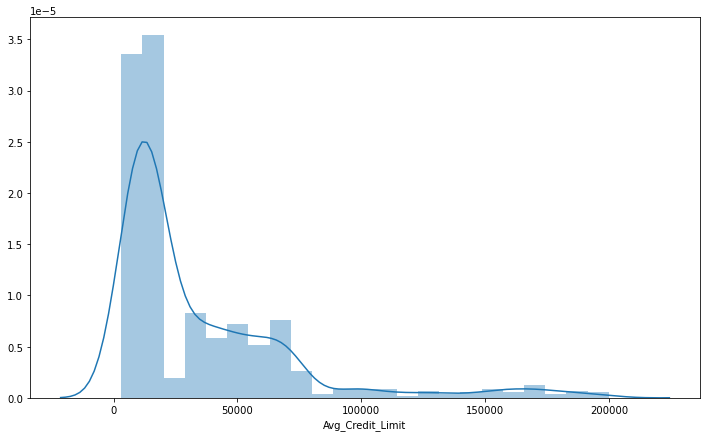

In [101]:
#check for avarage credit limit 
plt.figure(figsize=(12,7))
sns.distplot(data.Avg_Credit_Limit);

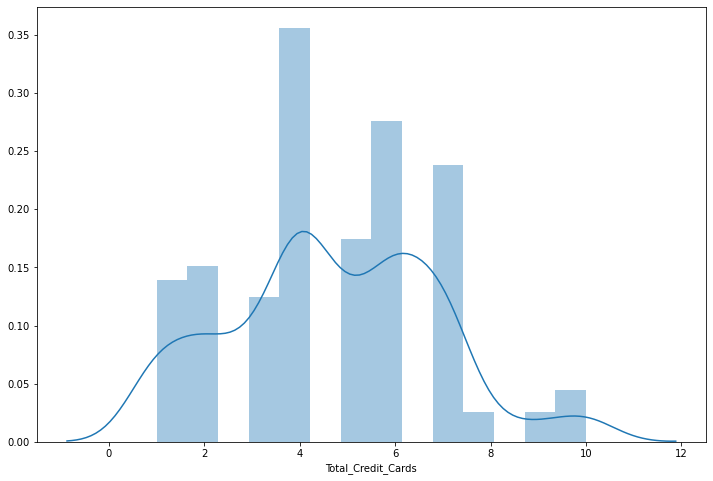

In [102]:
# Total Credit Card distribution 
plt.figure(figsize=(12,8))
sns.distplot(data.Total_Credit_Cards);

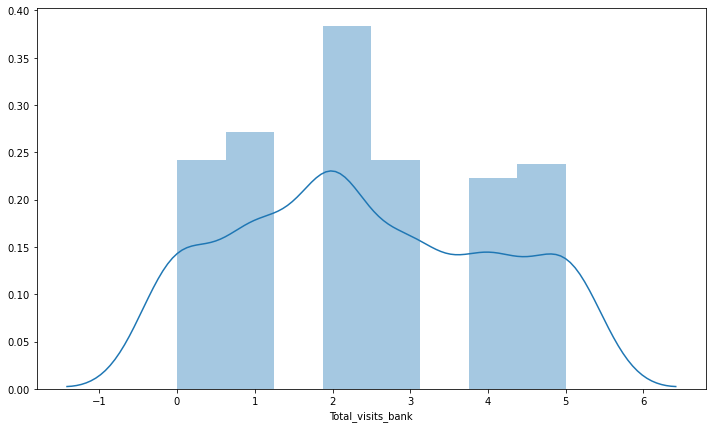

In [103]:
#Total bank visits by customers
plt.figure(figsize=(12,7))
sns.distplot(data.Total_visits_bank);

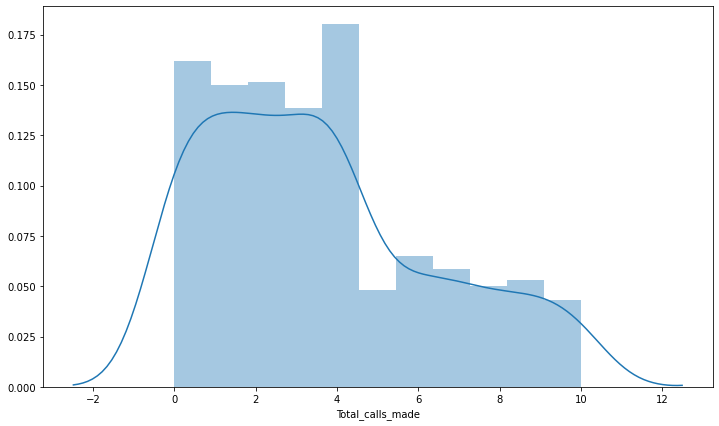

In [104]:
plt.figure(figsize=(12,7))
sns.distplot(data.Total_calls_made);

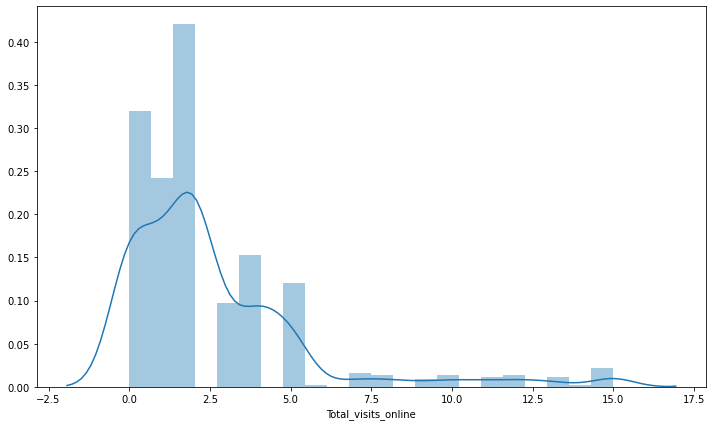

In [105]:
plt.figure(figsize=(12,7))
sns.distplot(data.Total_visits_online);

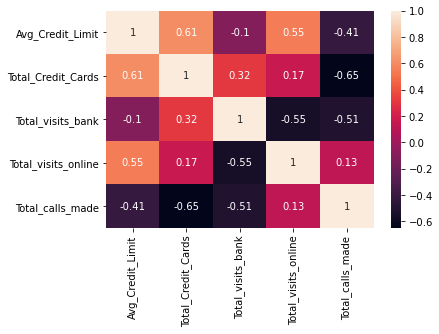

In [106]:
sns.heatmap(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

In [107]:
data.corr(method='kendall')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.048772,-0.005471,-0.002259,0.005778,-0.000494
Avg_Credit_Limit,0.048772,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,-0.005471,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,-0.002259,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,0.005778,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.000494,-0.326996,-0.492532,-0.373968,0.310855,1.000000


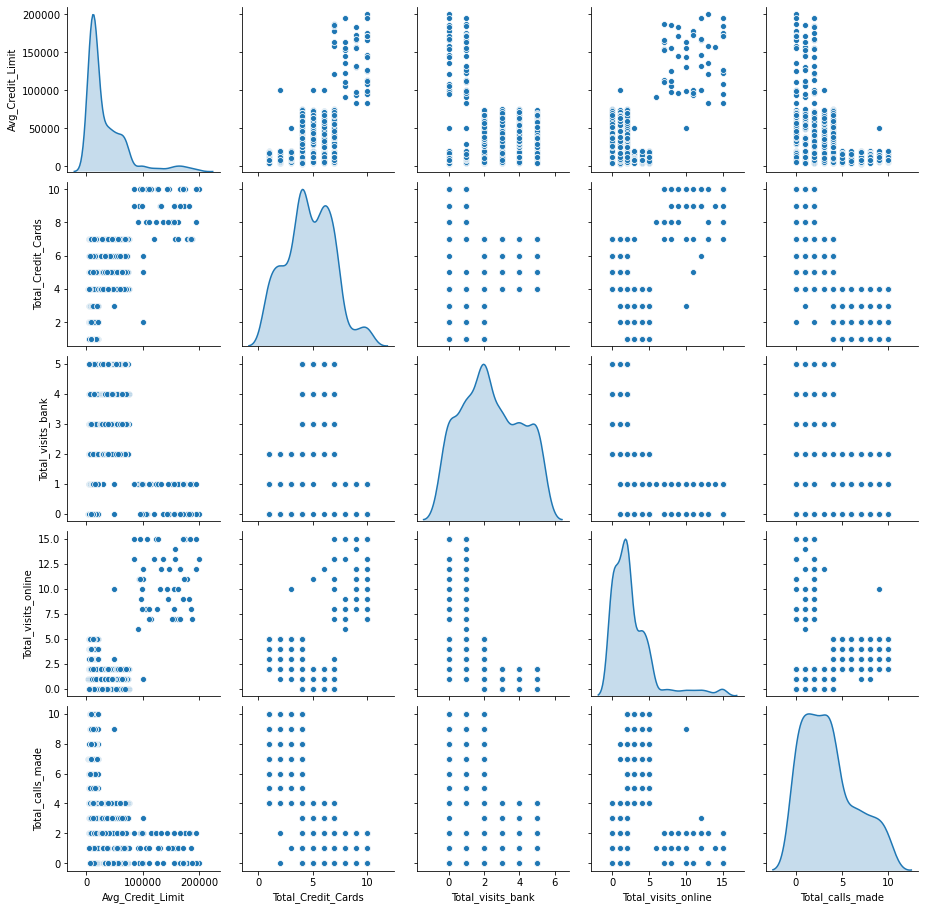

In [108]:
sns.pairplot(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');

In [109]:
#Check and see if we do have categorical variable in case to creat dummies:
print('credit cards uniqe values : ' ,data.Total_Credit_Cards.value_counts())
print('visit banks uniqe values : ',data.Total_visits_bank.value_counts())
print('visist online uniqe values : ',data.Total_visits_online.value_counts())
print('call made uniqe values : ', data.Total_calls_made.value_counts())

credit cards uniqe values :  4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
visit banks uniqe values :  2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64
visist online uniqe values :  2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64
call made uniqe values :  4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64


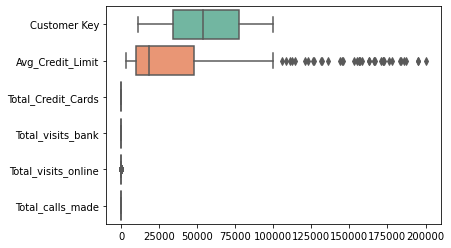

In [110]:
#To check for outliers in variables
ax=sns.boxplot(data=data, orient="h", palette="Set2")

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8801503a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c880150a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c880150040>],
 'medians': [<matplotlib.lines.Line2D at 0x1c88015a160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c88015a460>],
 'means': []}

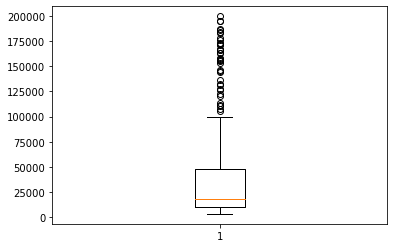

In [111]:
# We could see some outliers for Avg_Credit_Limit
plt.boxplot(data['Avg_Credit_Limit'])

In [112]:
# take logaritmic transform for Avg_Credit_Limit to remove outliers
data['Avg_Credit_Limit'] = np.log(data['Avg_Credit_Limit'])
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,11.512925,2,1,1,0
2,38414,10.819778,3,0,10,9
3,17341,10.819778,7,1,3,4
4,40496,10.308953,5,1,1,4
5,47437,11.512925,6,0,12,3


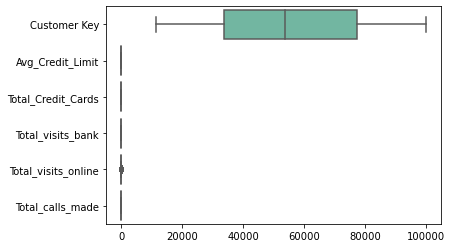

In [113]:
ax=sns.boxplot(data=data, orient="h", palette="Set2")

__If we decide to categrize bank users into three distinct sections :__
1. In-person users: prefer to handle bank transactions in person. They have the fewest credit cards and the lowest available credit. They are also the most active users.
2. Phone users: prefer verbally handling transactions remotely.
3. Online users: prefer digital transactions. They also have the most credit cards and the highest available credit.
    
Then we can plot this three categories and see how it demonstrates in 3D space

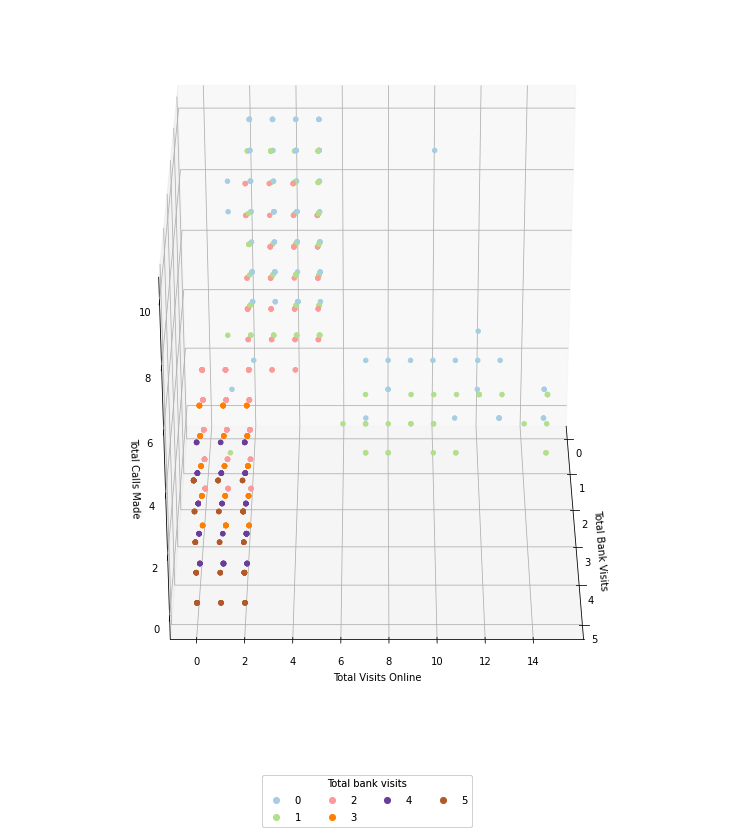

In [114]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)

x = data.Total_visits_bank
y = data.Total_visits_online
z = data.Total_calls_made

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

# plt.show()

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

__From the plot above we can clearly see there is at least three cluster by data__

### KMeans Clustering

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

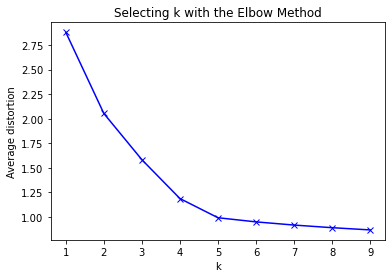

In [164]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model_km=KMeans(n_clusters=k)
    model_km.fit(data_scaled)
    prediction=model_km.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model_km.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [165]:
#clustering first start with K = 3
model_3 = KMeans(n_clusters=3)
model_3.fit(data_scaled)
preds = model_3.predict(data_scaled)

In [166]:
from sklearn.metrics import silhouette_score
labels = model_3.labels_
silhouette_score(data_scaled, labels, metric='euclidean')

0.50799346773095

In [167]:
data['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
data_scaled['Kmean_grouping'] = preds

data_gp = data.groupby('Kmean_grouping').mean()

In [169]:
data.Kmean_grouping.value_counts()

2    247
0    223
1    190
Name: Kmean_grouping, dtype: int64

In [119]:
#Clustering with K = 5
model_5=KMeans(5)
model_5.fit(data_scaled)
preds=model_5.predict(data_scaled)

#Append the prediction 
data_5=data.copy()
data_5['Kmean_grouping_5'] = preds
data_scaled['Kmean_grouping_5'] = preds

data_5.groupby('Kmean_grouping_5').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
Kmean_grouping_5,,,,,,,
0,190,190,190,190,190,190,190
1,123,123,123,123,123,123,123
2,50,50,50,50,50,50,50
3,101,101,101,101,101,101,101
4,196,196,196,196,196,196,196


In [120]:
from sklearn.metrics import silhouette_score
labels = model_5.labels_
silhouette_score(data_scaled, labels, metric='euclidean')

0.5727604610739733

In [121]:
data_mean = data_5.groupby(['Kmean_grouping_5'])
data_mean.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
Kmean_grouping_5,,,,,,,
0,55714.684211,10.065360,5.478947,4.515789,1.010526,1.936842,0
1,54766.317073,9.327481,2.357724,0.878049,3.626016,8.398374,1
2,56708.760000,11.825513,8.740000,0.600000,10.900000,1.080000,2
3,55816.485149,9.306784,2.475248,1.000000,3.465347,5.009901,1
4,54073.484694,10.237125,5.551020,2.494898,0.954082,2.061224,0


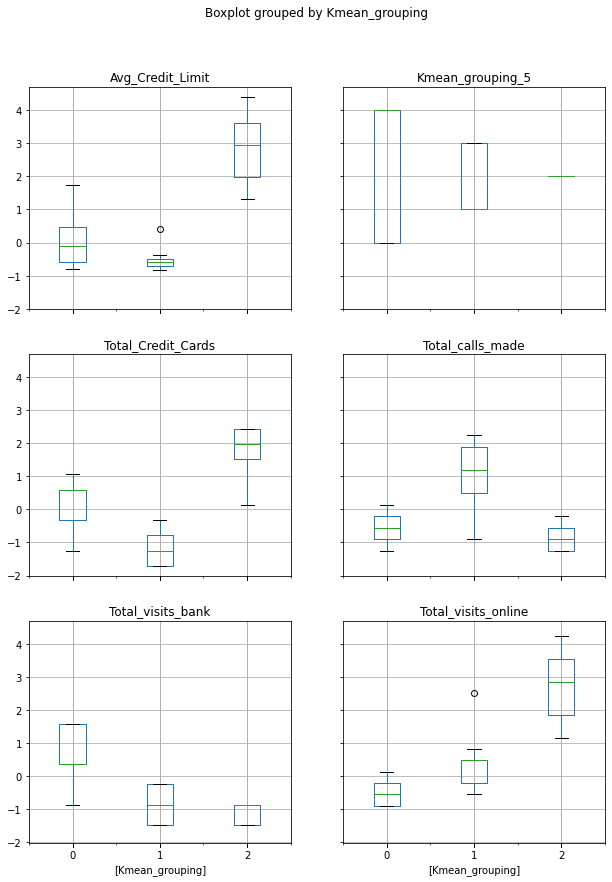

In [122]:
data_scaled.boxplot(by='Kmean_grouping', layout=(3,2), figsize=(10,14));

__Insights for KMean Clustering:__

- cluster 1 or online users who have the highest avarage of credit ammount limit which are holding the most credit cards they prefer online for thier banking transactions than making call or visit bank in person

- cluster 2 Phone users prefer verbally handling transactions remotely and have the lowest avarage credit limit

- cluster 3 or In-person users which prefer to handle bank transactions in person They are Mid user of credit card and mid availability of credits 


### Hierarchical Clustering

__4. Execute hierarchical clustering (with different linkages) with the help of dendrogram
and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)__


In [170]:
from sklearn.cluster import AgglomerativeClustering 

In [171]:
modelhc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [172]:
modelhc.fit(data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [173]:
data_hc=data.copy()

data_hc['labels'] = modelhc.labels_
data_scaled['labels']=modelhc.labels_
data_hc.head(10)



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,labels
Sl_No,,,,,,,,
1,87073,11.512925,2,1,1,0,2,0
2,38414,10.819778,3,0,10,9,0,0
3,17341,10.819778,7,1,3,4,2,0
4,40496,10.308953,5,1,1,4,2,0
5,47437,11.512925,6,0,12,3,2,1
6,58634,9.903488,3,0,1,8,0,0
7,48370,11.512925,5,0,11,2,2,1
8,37376,9.615805,3,0,1,1,2,0
9,82490,8.517193,2,0,2,2,0,0


In [174]:
data_hc_gp=data_hc.groupby(['labels'])

In [175]:
data_hc_gp.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
labels,,,,,,,
0,54695.535714,9.747004,3.876190,1.661905,2.340476,4.626190,0.938095
1,56708.760000,11.825513,8.740000,0.600000,10.900000,1.080000,2.000000
2,55714.684211,10.065360,5.478947,4.515789,1.010526,1.936842,1.000000


In [176]:
data_hc.labels.value_counts()

0    420
2    190
1     50
Name: labels, dtype: int64

In [177]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [178]:
score = silhouette_score(data_scaled, modelhc.labels_, metric='euclidean')
print('Silhouetter Score for hierarchical clustering  : %.3f' % score)


Silhouetter Score for hierarchical clustering  : 0.499


In [179]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data_scaled))

c

0.9377829044541253

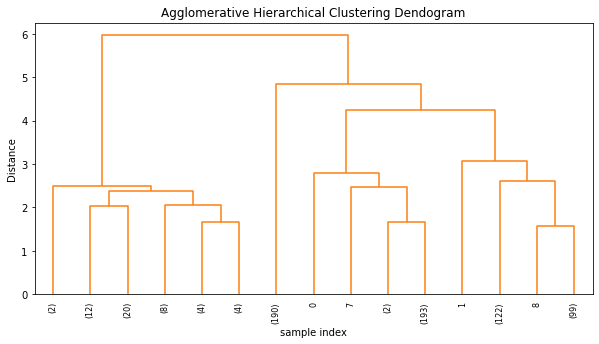

In [180]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
# dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
# plt.tight_layout()
dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

In [181]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(data_scaled))

c

0.918986363920218

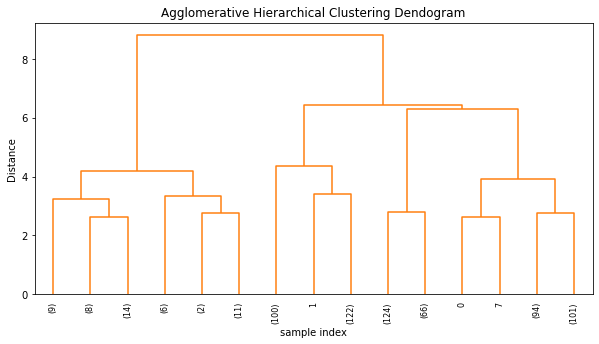

In [182]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

In [183]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(data_scaled))

c

0.871923455306198

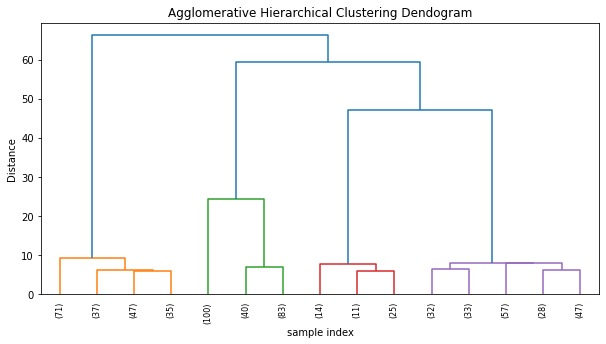

In [184]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D2B6C190>,
      dtype=object)

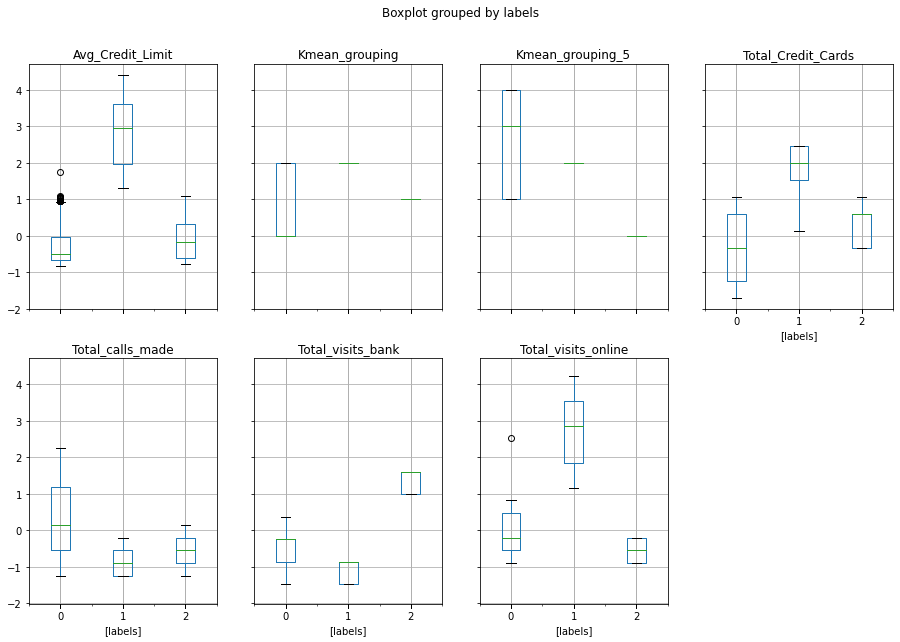

In [185]:
data_scaled.boxplot(by="labels", layout = (2,4),figsize=(15,10))

__Insight for hierarchical clustering:__

- cluster 1 or online users who have the highest avarage of credit ammount limit (high mean of credit amount) which are holding the most credit cards they prefer online for thier banking transactions than making call or visit bank in person

- cluster 2 Phone users that prefer verbally handling transactions remotely and have the lowest credit availibility 

- cluster 3 or In-person users which prefer to handle bank transactions in person They have the fewest credit cards and the lowest available credit (Low mean of credit amount)

### Marketing Strategy Suggested:
Online/phone users will probably prefer email/text notifications, while in-person users mail prefer mail notifications and upselling (when at the bank location). Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our next ad campaign, focusing on digit recruiting.